# Challenge 3

In [18]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [19]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [20]:
#your code here
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [21]:
# your code here- numerical variable
titanic.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [31]:
#your code here- categorical variable
titanic.select_dtypes(exclude=np.number)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [32]:
# your code here
plt.style.use('classic')

from matplotlib.pyplot import figure
figure(figsize=(10, 10), facecolor='w', edgecolor='k')


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

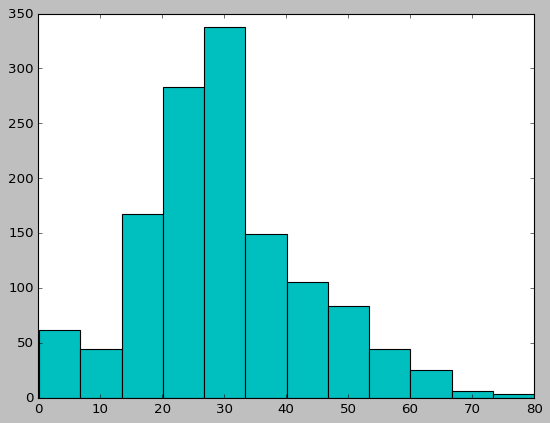

In [70]:
# your code here
plt.hist(x=titanic['Age'], bins = 12, color='c')
plt.show()



#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

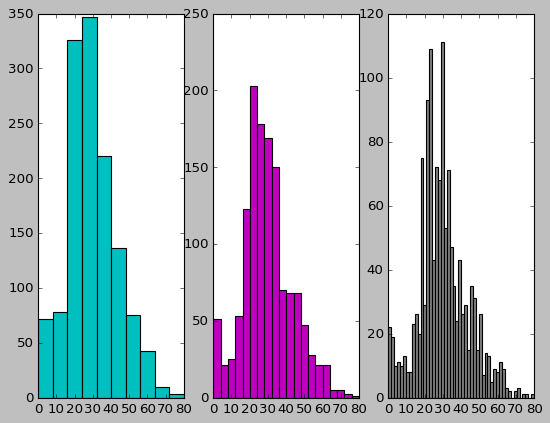

In [72]:
# your code here

#bins_list = [10,20,50]
#ax = plt.hist(x= titanic['Age'], bins = bins_list, color= 'pink')

fig, axs= plt.subplots(1,3)

axs[0].hist(x =titanic['Age'], bins= 10, color= 'c')
axs[1].hist(x =titanic['Age'], bins= 20, color= 'm')
axs[2].hist(x =titanic['Age'], bins= 50, color= 'grey')

plt.show()


#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here

"""""
The larger the bin sizes, the fewer bins there will be to cover the whole range of data. 
With a smaller bin size, the more bins there will need to be. 

It is important to find the ideal balance between both. If there are too many bins the data can look rough
on the other hand, with too few bins, the histogram will lack the details needed to discern any useful pattern 
from the data.

""""

#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

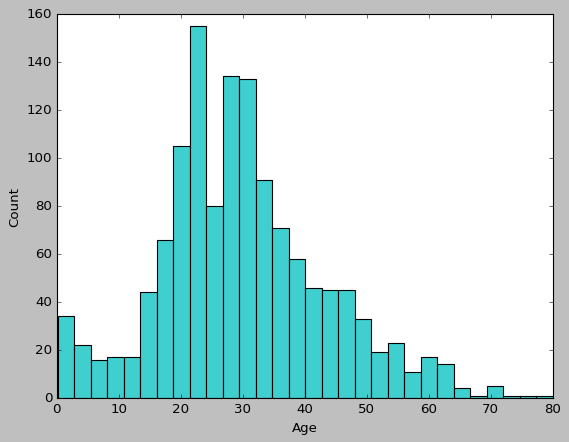

In [71]:
# your code here
sns.histplot(x =titanic['Age'],color='c')



#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

In [163]:
# your code here- 1st way
#Nose como se hace... porque usar un histograma no tiene sentido

#plt.hist(x=titanic['Gender'], bins = 2, color='c')
#plt.show()

fig = plt.figure()
ax.bar(x=titanic['Gender'],height=titanic['Age'])
plt.show()

<Figure size 640x480 with 0 Axes>

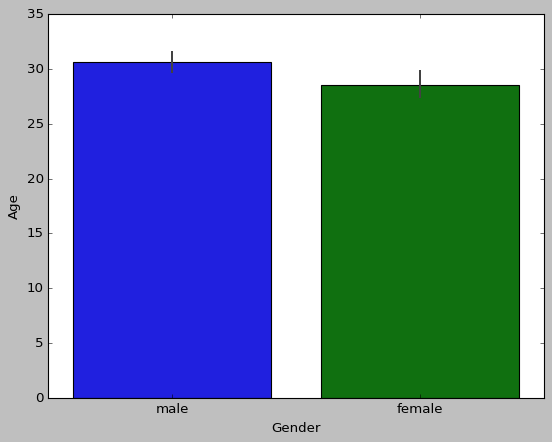

In [121]:
# your code here- 2nd way
bar_plot_2 = sns.barplot(x='Gender', y='Age',data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


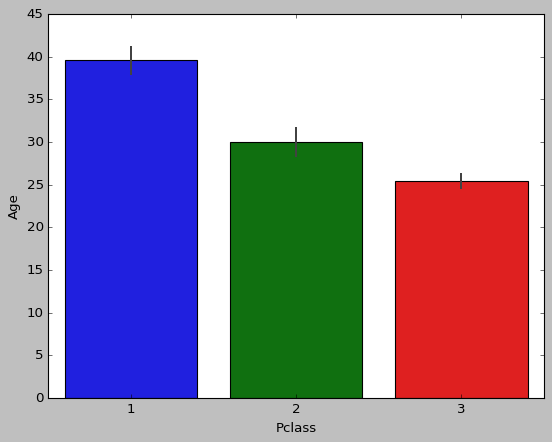

In [175]:
# your code here
#Lo he hecho en funcion de la edad, porque no sabia como poner el count en y
bar_plot_3 = sns.barplot(x='Pclass', y='Age',data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [182]:
# your code here
index=['female','male']
df= pd.DataFrame({'Age':titanic'Age',
                 'Gender':'Gender'}, index=index)
ax = df.plot.bar(stacked=True)

SyntaxError: invalid syntax (<ipython-input-182-ee14b1ebffb9>, line 3)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [177]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [ ]:
#your code-1st way


In [ ]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [ ]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
